Import Necessary Libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import re 

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    silhouette_score,
    accuracy_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    confusion_matrix
)
import json
from pandas import json_normalize
from datetime import datetime
from matplotlib.patches import Circle

In [2]:
df = pd.read_csv('training.csv', sep=';', low_memory=False)
df

,timestamp,datetime_utc,frame,slot,pci,id,dlCarrierFreq,ulCarrierFreq,avgLdpcIterations,_id.$oid,...,dlMcs,ulMcs,ulBler,ri,pcmax,puschSnr,dlBler,phr,rsrq,sinr
0,1.750111e+12,2025-06-17T00:00:00.300000+02:00,985.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e02604a8675b1f3c3b,...,9.0,9.0,0.0,2.0,16.0,14.5,0.0,52.0,-10.5,23.5
1,1.750111e+12,2025-06-17T00:00:01.300000+02:00,61.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e12604a8675b1f3c3c,...,9.0,9.0,0.0,2.0,16.0,14.5,0.0,52.0,-10.5,23.5
2,1.750111e+12,2025-06-17T00:00:02.300000+02:00,161.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e22604a8675b1f3c3d,...,9.0,9.0,0.0,2.0,16.0,15.0,0.0,52.0,-10.5,23.5
3,1.750111e+12,2025-06-17T00:00:03.300000+02:00,261.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e32604a8675b1f3c3e,...,9.0,9.0,0.0,2.0,16.0,15.0,0.0,52.0,-10.5,23.5
4,1.750111e+12,2025-06-17T00:00:04.300000+02:00,361.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e42604a8675b1f3c3f,...,9.0,9.0,0.0,2.0,16.0,15.5,0.0,52.0,-10.5,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162603,1.750198e+12,2025-06-17T23:59:59.937000+02:00,882.0,18.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,6851e55f2604a8675b2073d9,...,9.0,8.0,0.0,2.0,24.0,19.0,0.0,52.0,-10.5,23.5
162604,1.750198e+12,2025-06-17T23:59:59.937000+02:00,882.0,18.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,6851e55f2604a8675b2073d9,...,5.0,6.0,0.0,2.0,24.0,19.0,0.0,52.0,-10.5,23.5
162605,1.750198e+12,2025-06-17T23:59:59.937000+02:00,882.0,18.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,6851e55f2604a8675b2073d9,...,9.0,6.0,0.0,2.0,25.0,9.5,0.0,52.0,-10.5,23.5
162606,1.750198e+12,2025-06-17T23:59:59.937000+02:00,882.0,18.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,6851e55f2604a8675b2073d9,...,9.0,8.0,0.0,4.0,22.0,12.5,0.0,52.0,-10.5,23.5


Training DATA Analysis

In [3]:
df.shape # size of the training data (#rows, #features)

(162608, 30)

In [4]:
df.head(5)

,timestamp,datetime_utc,frame,slot,pci,id,dlCarrierFreq,ulCarrierFreq,avgLdpcIterations,_id.$oid,...,dlMcs,ulMcs,ulBler,ri,pcmax,puschSnr,dlBler,phr,rsrq,sinr
0,1.750111e+12,2025-06-17T00:00:00.300000+02:00,985.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e02604a8675b1f3c3b,...,9.0,9.0,0.0,2.0,16.0,14.5,0.0,52.0,-10.5,23.5
1,1.750111e+12,2025-06-17T00:00:01.300000+02:00,61.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e12604a8675b1f3c3c,...,9.0,9.0,0.0,2.0,16.0,14.5,0.0,52.0,-10.5,23.5
2,1.750111e+12,2025-06-17T00:00:02.300000+02:00,161.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e22604a8675b1f3c3d,...,9.0,9.0,0.0,2.0,16.0,15.0,0.0,52.0,-10.5,23.5
3,1.750111e+12,2025-06-17T00:00:03.300000+02:00,261.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e32604a8675b1f3c3e,...,9.0,9.0,0.0,2.0,16.0,15.0,0.0,52.0,-10.5,23.5
4,1.750111e+12,2025-06-17T00:00:04.300000+02:00,361.0,4.0,0.0,12345678.0,3.750240e+09,3.750240e+09,3.0,685093e42604a8675b1f3c3f,...,9.0,9.0,0.0,2.0,16.0,15.5,0.0,52.0,-10.5,23.5


In [5]:

is_all_same = df['pci'].nunique() == 1

print(is_all_same)

True


In [6]:
df.dropna(inplace = True) # dropping NaN Values i.e removing all empty noisy data
df.shape # size after removing NaN values

(155279, 30)

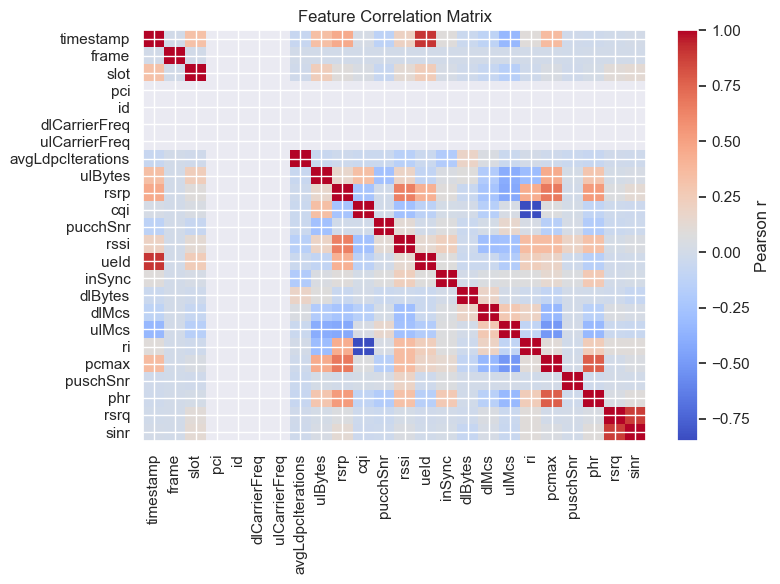

In [7]:
#Analysing the correlation between features (Only Numeric features)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols] .corr()
scaler = StandardScaler()
df1 = pd.DataFrame()
df1[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#print("Correlation matrix:\n", corr)

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest', aspect='auto')
plt.colorbar(label='Pearson r')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Removing 2% of outliers/Noisy data using Isolation Forest

In [8]:
from sklearn.ensemble import IsolationForest

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
iso = IsolationForest(contamination=0.01, random_state=42)
df['iforest_label'] = iso.fit_predict(df[numeric_cols])
# label = −1 is an outlier
n_iso = (df['iforest_label'] == -1).sum()
print("IsolationForest outliers:", n_iso, f"({n_iso/len(df):.2%})")

IsolationForest outliers: 1553 (1.00%)


In [9]:
df = df[df['iforest_label'] == 1].reset_index(drop=True) #keeping only inliners
df.drop(columns=['iforest_label'], inplace=True)

In [10]:
df.describe()

,timestamp,frame,slot,pci,id,dlCarrierFreq,ulCarrierFreq,avgLdpcIterations,ulBytes,rsrp,...,inSync,dlBytes,dlMcs,ulMcs,ri,pcmax,puschSnr,phr,rsrq,sinr
count,1.537260e+05,153726.000000,153726.000000,153726.0,153726.0,1.537260e+05,1.537260e+05,153726.000000,1.537260e+05,153726.000000,...,153726.000000,1.537260e+05,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000
mean,1.750179e+12,512.560757,11.861676,0.0,12345678.0,3.750240e+09,3.750240e+09,3.247596,2.103871e+07,-81.574379,...,0.998751,1.045466e+07,7.999766,7.508632,2.401962,21.647223,15.847501,50.602325,-10.524375,23.240399
std,1.709821e+07,295.479180,6.564988,0.0,0.0,0.000000e+00,0.000000e+00,0.348767,2.722655e+07,3.653002,...,0.035319,1.244040e+08,2.388739,1.374157,0.810654,3.408019,4.116930,2.892530,0.126557,1.288369
min,1.750111e+12,0.000000,3.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.000000,0.000000e+00,-99.000000,...,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,-12.500000,8.500000
25%,1.750173e+12,258.000000,4.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.100000,2.352379e+06,-85.000000,...,1.000000,8.543982e+05,9.000000,6.000000,2.000000,16.000000,11.000000,52.000000,-10.500000,23.500000
50%,1.750182e+12,513.000000,9.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.200000,8.482468e+06,-82.000000,...,1.000000,2.410364e+06,9.000000,7.000000,2.000000,24.000000,18.000000,52.000000,-10.500000,23.500000
75%,1.750190e+12,768.000000,19.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,3.300000,2.941394e+07,-78.000000,...,1.000000,5.165862e+06,9.000000,9.000000,2.000000,24.000000,19.000000,52.000000,-10.500000,23.500000
max,1.750198e+12,1023.000000,19.000000,0.0,12345678.0,3.750240e+09,3.750240e+09,9.700000,1.148044e+08,-69.000000,...,1.000000,3.652848e+09,27.000000,27.000000,4.000000,25.000000,38.500000,65.000000,-10.500000,23.500000


In [11]:
#features in the data
df.columns

Index(['timestamp', 'datetime_utc', 'frame', 'slot', 'pci', 'id',
       'dlCarrierFreq', 'ulCarrierFreq', 'avgLdpcIterations', '_id.$oid',
       'rnti', 'ulBytes', 'pmi', 'rsrp', 'cqi', 'pucchSnr', 'rssi', 'ueId',
       'inSync', 'dlBytes', 'dlMcs', 'ulMcs', 'ulBler', 'ri', 'pcmax',
       'puschSnr', 'dlBler', 'phr', 'rsrq', 'sinr'],
      dtype='object')

Considering the following features for user signature:
'rnti'
'rsrp'
'pucchSnr'
'rssi'
'ulBler'
'puschSnr'
'dlBler'
'rsrq'
'sinr'


In [12]:
to_drop = ['datetime_utc',
    '_id.$oid', 'id', 'ueId',  'cqi',    # network IDs
    'timestamp', 'frame', 'slot',       # timing/order markers
    'pci', 'ulCarrierFreq', 'dlCarrierFreq',  # cell/carrier config
    'dlMcs', 'ulMcs', 'ri', 'pmi', 'phr', 'pcmax',  # control/scheduling
    'ulBytes', 'dlBytes', 'inSync' , 'avgLdpcIterations'    # traffic & state
]

df = df.drop(columns=to_drop, errors='ignore')

df.columns

Index(['rnti', 'rsrp', 'pucchSnr', 'rssi', 'ulBler', 'puschSnr', 'dlBler',
       'rsrq', 'sinr'],
      dtype='object')

In [13]:
df.head(25)

,rnti,rsrp,pucchSnr,rssi,ulBler,puschSnr,dlBler,rsrq,sinr
0,4a4b,-89.0,13.0,78.1,0.0,14.5,0.0,-10.5,23.5
1,4a4b,-89.0,13.0,78.0,0.0,14.5,0.0,-10.5,23.5
2,4a4b,-89.0,13.0,78.0,0.0,15.0,0.0,-10.5,23.5
3,4a4b,-89.0,14.0,78.0,0.0,15.0,0.0,-10.5,23.5
4,4a4b,-89.0,13.0,78.1,0.0,15.5,0.0,-10.5,23.5
5,4a4b,-89.0,13.0,78.1,0.0,15.0,0.0,-10.5,23.5
6,4a4b,-89.0,13.0,78.1,0.0,15.0,0.0,-10.5,23.5
7,4a4b,-89.0,13.0,78.0,0.0,15.5,0.0,-10.5,23.5
8,4a4b,-89.0,13.0,78.0,0.0,15.5,0.0,-10.5,23.5
9,4a4b,-89.0,13.0,77.9,0.0,14.5,0.0,-10.5,23.5


In [14]:
df.describe()

,rsrp,pucchSnr,rssi,puschSnr,rsrq,sinr
count,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000,153726.000000
mean,-81.574379,16.025988,81.324162,15.847501,-10.524375,23.240399
std,3.653002,1.458107,2.993626,4.116930,0.126557,1.288369
min,-99.000000,3.000000,62.000000,3.000000,-12.500000,8.500000
25%,-85.000000,15.000000,78.900000,11.000000,-10.500000,23.500000
50%,-82.000000,16.000000,82.000000,18.000000,-10.500000,23.500000
75%,-78.000000,17.000000,83.700000,19.000000,-10.500000,23.500000
max,-69.000000,43.000000,101.600000,38.500000,-10.500000,23.500000


In [15]:
raw_cols = ['rsrp', 'pucchSnr', 'rssi', 'ulBler', 'puschSnr', 'dlBler',
       'rsrq', 'sinr']

In [16]:
for col in raw_cols:
    bad_values = df[col].astype(str).str.contains(",", regex=False)
    if bad_values.any():
        print(f"Issue in column '{col}':")
        print(df.loc[bad_values, col])

Issue in column 'ulBler':
90        7,00E-06
91        3,00E-06
92        1,00E-06
641       7,00E-05
643       9,00E-06
            ...   
153449    3,00E-06
153454    1,00E-06
153629    6,00E-06
153634    2,00E-06
153639    1,00E-06
Name: ulBler, Length: 3775, dtype: object
Issue in column 'dlBler':
663       9,00E-06
664       4,00E-06
665       2,00E-06
666       1,00E-06
1724      3,00E-05
            ...   
148670    1,00E-06
148675    1,00E-06
148680    1,00E-06
148685    1,00E-06
148690    1,00E-06
Name: dlBler, Length: 3444, dtype: object


In [17]:
bad_rows = df['ulBler'].astype(str).str.count(r'\.') > 1
print(df[bad_rows])
df = df[~bad_rows]

      rnti  rsrp  pucchSnr  rssi     ulBler  puschSnr    dlBler  rsrq  sinr
8987  b757 -90.0      15.0  80.9  1.012.432      17.0  0.000143 -10.5  23.5


In [18]:
for col in ['ulBler', 'dlBler']:
    count = df[col].astype(str).str.count(r'\.').gt(1).sum()
    print(f"Column '{col}' has {count} values with multiple dots.")

Column 'ulBler' has 0 values with multiple dots.
Column 'dlBler' has 0 values with multiple dots.


In [19]:
for col in ['ulBler', 'dlBler']:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False).astype(float)

In [20]:

scaler_raw = StandardScaler() # Normalise
df_scaled = pd.DataFrame() # A new DataFrame to work on
df_scaled[raw_cols] = scaler_raw.fit_transform(df[raw_cols])


In [21]:
df_scaled['rnti']= df['rnti'] 

In [22]:
df_scaled.head()

,rsrp,pucchSnr,rssi,ulBler,puschSnr,dlBler,rsrq,sinr,rnti
0,-2.032795,-2.075293,-1.077010,-0.193929,-0.327306,-0.178169,0.192598,0.201498,4a4b
1,-2.032795,-2.075293,-1.110414,-0.193929,-0.327306,-0.178169,0.192598,0.201498,4a4b
2,-2.032795,-2.075293,-1.110414,-0.193929,-0.205856,-0.178169,0.192598,0.201498,4a4b
3,-2.032795,-1.389471,-1.110414,-0.193929,-0.205856,-0.178169,0.192598,0.201498,4a4b
4,-2.032795,-2.075293,-1.077010,-0.193929,-0.084406,-0.178169,0.192598,0.201498,4a4b


CREATING TIME WINDOWED SEQUENCES for each window: the mean of the features and their corresponding correalations are captured

In [23]:

def extract_phy_signatures(df_scaled,
                           raw_features=None,
                           window_size=50,
                           step_size=50,
                           label_col=None):
    """
    Slide a window over df and for each window compute:
      - mean of each raw_feature
      - Pearson correlation of every pair of raw_features

    Parameters
    ----------
    df : pd.DataFrame
        Preprocessed, timestamp-sorted DataFrame of physical-layer columns.
    raw_features : list of str, optional
        Columns to treat as the base attributes. If None, defaults to:
        ['sinr','rsrp','rssi','cqi','pucchSnr','puschSnr','ulBler','dlBler']
    window_size : int
        Number of rows per window.
    step_size : int
        Sliding step between windows (use ==window_size for non-overlap).
    label_col : str, optional
        Name of a column (e.g. 'rnti' or 'ueId') whose mode in each window
        will be returned as the true label for that signature.

    Returns
    -------
    sig_df : pd.DataFrame
        Each row is a signature: [mean_{f1} … mean_{fD}, corr_{f1,f2} …]
    labels : list, only if label_col is set
        The mode of `label_col` in each window, in the same order as sig_df.
    """
    if raw_features is None:
        raw_features = [
            'sinr', 'rsrp', 'rssi','rsrq',
            'pucchSnr', 'puschSnr', 'ulBler', 'dlBler'
        ]

    D = len(raw_features)
    # build column names
    corr_pairs = [(i, j) for i in range(D) for j in range(i+1, D)]
    col_names = ([f"mean_{f}" for f in raw_features] +
                [f"corr_{raw_features[i]}_{raw_features[j]}" 
                   for i,j in corr_pairs])

    signatures = []
    labels = []  # only used if label_col is provided

    for start in range(0, len(df_scaled) - window_size + 1, step_size):
        w = df_scaled.iloc[start:start+window_size]

        # 1) raw means
        means = w[raw_features].mean().values

        # 2) correlations
        cmat = w[raw_features].corr().values
        iu = np.triu_indices(D, k=1)
        corr_vals = cmat[iu]

        signatures.append(np.concatenate([means, corr_vals]))
        #signatures.append(means)
        # 3) window label (mode of label_col)
        if label_col is not None:
            labels.append(w[label_col].mode()[0])

    sig_df = pd.DataFrame(signatures, columns=col_names)
    if label_col is not None:
        return sig_df, labels
    return sig_df


# ----------------------------
# Example usage:



# 2) Get signatures *and* the per-window RNTI mode



In [24]:
sig_df, window_rntis = extract_phy_signatures(
    df_scaled,
    window_size=100,
    step_size=100,
    label_col='rnti'
)

In [25]:
sig_df.columns

Index(['mean_sinr', 'mean_rsrp', 'mean_rssi', 'mean_rsrq', 'mean_pucchSnr',
       'mean_puschSnr', 'mean_ulBler', 'mean_dlBler', 'corr_sinr_rsrp',
       'corr_sinr_rssi', 'corr_sinr_rsrq', 'corr_sinr_pucchSnr',
       'corr_sinr_puschSnr', 'corr_sinr_ulBler', 'corr_sinr_dlBler',
       'corr_rsrp_rssi', 'corr_rsrp_rsrq', 'corr_rsrp_pucchSnr',
       'corr_rsrp_puschSnr', 'corr_rsrp_ulBler', 'corr_rsrp_dlBler',
       'corr_rssi_rsrq', 'corr_rssi_pucchSnr', 'corr_rssi_puschSnr',
       'corr_rssi_ulBler', 'corr_rssi_dlBler', 'corr_rsrq_pucchSnr',
       'corr_rsrq_puschSnr', 'corr_rsrq_ulBler', 'corr_rsrq_dlBler',
       'corr_pucchSnr_puschSnr', 'corr_pucchSnr_ulBler',
       'corr_pucchSnr_dlBler', 'corr_puschSnr_ulBler', 'corr_puschSnr_dlBler',
       'corr_ulBler_dlBler'],
      dtype='object')

In [26]:
sig_df.describe()

,mean_sinr,mean_rsrp,mean_rssi,mean_rsrq,mean_pucchSnr,mean_puschSnr,mean_ulBler,mean_dlBler,corr_sinr_rsrp,corr_sinr_rssi,...,corr_rsrq_pucchSnr,corr_rsrq_puschSnr,corr_rsrq_ulBler,corr_rsrq_dlBler,corr_pucchSnr_puschSnr,corr_pucchSnr_ulBler,corr_pucchSnr_dlBler,corr_puschSnr_ulBler,corr_puschSnr_dlBler,corr_ulBler_dlBler
count,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,199.000000,202.000000,...,150.000000,150.000000,148.000000,75.000000,1537.000000,1450.000000,702.000000,1450.000000,702.000000,691.000000
mean,-0.000033,-0.000043,-0.000042,-0.000031,0.000083,-0.000016,0.000032,0.000029,0.440880,0.351611,...,-0.088399,-0.006368,0.184239,-0.107670,-0.005155,0.028429,0.119629,-0.003574,0.017818,0.040444
std,0.780224,0.500602,0.341160,0.767886,0.404524,0.092839,0.479245,0.443645,0.242267,0.272263,...,0.298247,0.078991,0.165736,0.209006,0.101315,0.172113,0.317103,0.098865,0.097389,0.263774
min,-6.648250,-2.109446,-2.114214,-6.128658,-2.377054,-0.463329,-0.193929,-0.178169,-0.007398,-0.644076,...,-0.731565,-0.284111,-0.246151,-0.946133,-0.516924,-0.990256,-0.991546,-0.762316,-0.762478,-0.282876
25%,0.201498,0.047722,-0.142357,0.192598,-0.312731,-0.051615,-0.156366,-0.178169,0.203719,0.129525,...,-0.258168,-0.056883,0.064737,-0.235015,-0.068905,-0.074169,-0.103772,-0.061357,-0.022841,-0.117846
50%,0.201498,0.102472,0.063747,0.192598,0.030180,-0.013965,-0.105093,-0.178169,0.492155,0.399163,...,-0.120831,0.002325,0.192422,-0.079504,-0.008942,0.044549,0.121301,0.006918,0.021864,-0.063493
75%,0.201498,0.239348,0.247471,0.192598,0.256501,0.035829,-0.032063,-0.109117,0.619879,0.586582,...,0.039539,0.040114,0.305512,0.033870,0.049632,0.140558,0.310351,0.061653,0.056584,0.102200
max,0.201498,0.795065,1.173772,0.192598,3.617027,0.373459,8.993176,7.150134,0.913650,0.863165,...,0.710047,0.215153,0.598922,0.437721,0.633890,0.973864,0.981900,0.581613,0.559304,0.999982


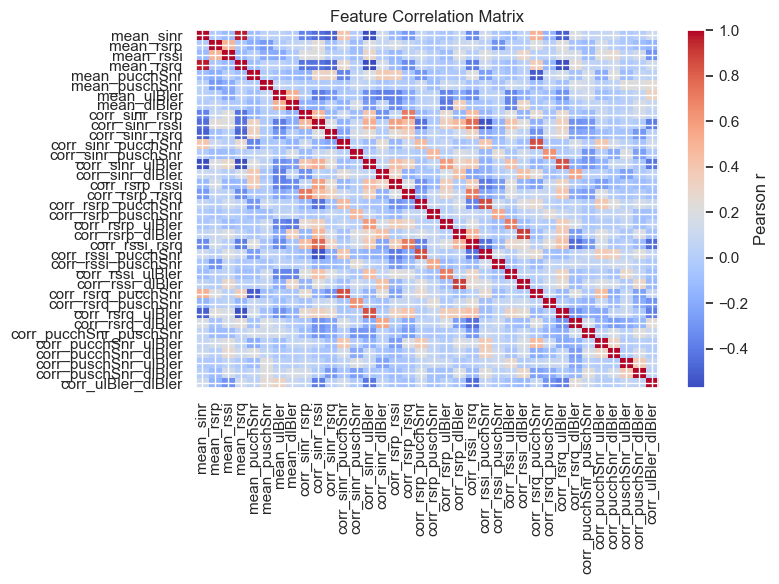

In [27]:

numeric_cols = sig_df.select_dtypes(include=[np.number]).columns.tolist()
corr = sig_df[numeric_cols].corr()
scaler = StandardScaler()
df_c = pd.DataFrame()
df_c[numeric_cols] = scaler.fit_transform(sig_df[numeric_cols])

#print("Correlation matrix:\n", corr)

# Visualize with a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest', aspect='auto')
plt.colorbar(label='Pearson r')
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [28]:
constant_cols = [col for col in numeric_cols if sig_df[col].nunique() <= 1]
print("Constant columns:", constant_cols)

Constant columns: []


In [29]:
# Get average absolute correlation of each feature with others
mean_corr = corr.abs().mean().sort_values()

print("Features with lowest mean correlation:")
print(mean_corr)


Features with lowest mean correlation:
mean_puschSnr             0.109745
corr_puschSnr_ulBler      0.110948
corr_rsrp_puschSnr        0.116013
corr_rssi_puschSnr        0.126679
corr_pucchSnr_dlBler      0.135031
mean_rsrp                 0.136350
corr_rsrq_puschSnr        0.136550
corr_sinr_puschSnr        0.140760
corr_pucchSnr_puschSnr    0.140794
corr_puschSnr_dlBler      0.148555
mean_dlBler               0.154872
mean_rssi                 0.157287
corr_pucchSnr_ulBler      0.161872
corr_ulBler_dlBler        0.164117
corr_rsrp_ulBler          0.173172
corr_rssi_dlBler          0.174676
mean_pucchSnr             0.176149
corr_sinr_dlBler          0.176805
corr_rssi_ulBler          0.177848
corr_sinr_pucchSnr        0.183850
corr_rsrp_pucchSnr        0.184733
corr_rsrq_dlBler          0.187888
mean_ulBler               0.189162
corr_sinr_rsrq            0.197313
corr_rsrp_dlBler          0.197417
corr_rsrq_pucchSnr        0.207017
corr_rssi_pucchSnr        0.208109
corr_sinr_rsrp  

In [30]:
low_corr_pairs = []
for col in corr.columns:
    for row in corr.index:
        if col != row and abs(corr.loc[row, col]) < 0.05:
            low_corr_pairs.append((row, col, corr.loc[row, col]))

# View top 10 uncorrelated pairs
print("Low-correlation feature pairs:")
for a, b, val in low_corr_pairs[:10]:
    print(f"{a} vs {b}: r = {val:.2f}")


Low-correlation feature pairs:
mean_rsrp vs mean_sinr: r = -0.03
mean_puschSnr vs mean_sinr: r = 0.02
mean_ulBler vs mean_sinr: r = 0.03
mean_dlBler vs mean_sinr: r = -0.01
corr_sinr_puschSnr vs mean_sinr: r = -0.01
corr_rsrp_puschSnr vs mean_sinr: r = -0.02
corr_rssi_dlBler vs mean_sinr: r = 0.04
corr_puschSnr_ulBler vs mean_sinr: r = -0.04
corr_puschSnr_dlBler vs mean_sinr: r = 0.00
mean_sinr vs mean_rsrp: r = -0.03


In [31]:
selected_features = [
    # Mean-based physical metrics
    'mean_sinr', 'mean_rsrp', 'mean_rsrq', 'mean_rssi',
    'mean_pucchSnr', 'mean_puschSnr', 'mean_ulBler', 'mean_dlBler',
    
    # Selected correlation-based features
    'corr_sinr_rsrp', 'corr_sinr_rsrq', 'corr_sinr_ulBler',
    'corr_rsrp_rsrq', 'corr_rsrp_rssi', 'corr_rsrp_ulBler',
    'corr_rssi_rsrq', 'corr_rssi_ulBler',
    'corr_sinr_dlBler', 'corr_rsrp_pucchSnr', 'corr_rsrp_dlBler',
    'corr_rsrq_ulBler', 'corr_pucchSnr_ulBler', 'corr_ulBler_dlBler'
]

In [32]:
sig_df.columns

Index(['mean_sinr', 'mean_rsrp', 'mean_rssi', 'mean_rsrq', 'mean_pucchSnr',
       'mean_puschSnr', 'mean_ulBler', 'mean_dlBler', 'corr_sinr_rsrp',
       'corr_sinr_rssi', 'corr_sinr_rsrq', 'corr_sinr_pucchSnr',
       'corr_sinr_puschSnr', 'corr_sinr_ulBler', 'corr_sinr_dlBler',
       'corr_rsrp_rssi', 'corr_rsrp_rsrq', 'corr_rsrp_pucchSnr',
       'corr_rsrp_puschSnr', 'corr_rsrp_ulBler', 'corr_rsrp_dlBler',
       'corr_rssi_rsrq', 'corr_rssi_pucchSnr', 'corr_rssi_puschSnr',
       'corr_rssi_ulBler', 'corr_rssi_dlBler', 'corr_rsrq_pucchSnr',
       'corr_rsrq_puschSnr', 'corr_rsrq_ulBler', 'corr_rsrq_dlBler',
       'corr_pucchSnr_puschSnr', 'corr_pucchSnr_ulBler',
       'corr_pucchSnr_dlBler', 'corr_puschSnr_ulBler', 'corr_puschSnr_dlBler',
       'corr_ulBler_dlBler'],
      dtype='object')

In [33]:
sig_df = sig_df[[col for col in selected_features if col in sig_df.columns]]

In [34]:
#sig_df.drop(columns = ['mean_rsrp', 'corr_rsrp_rssi', 'corr_rsrp_rsrq', 'corr_rsrp_pucchSnr',
      # 'corr_rsrp_puschSnr', 'corr_rsrp_ulBler', 'corr_rsrp_dlBler',], inplace = True)

In [35]:
sig_df.columns

Index(['mean_sinr', 'mean_rsrp', 'mean_rsrq', 'mean_rssi', 'mean_pucchSnr',
       'mean_puschSnr', 'mean_ulBler', 'mean_dlBler', 'corr_sinr_rsrp',
       'corr_sinr_rsrq', 'corr_sinr_ulBler', 'corr_rsrp_rsrq',
       'corr_rsrp_rssi', 'corr_rsrp_ulBler', 'corr_rssi_rsrq',
       'corr_rssi_ulBler', 'corr_sinr_dlBler', 'corr_rsrp_pucchSnr',
       'corr_rsrp_dlBler', 'corr_rsrq_ulBler', 'corr_pucchSnr_ulBler',
       'corr_ulBler_dlBler'],
      dtype='object')

In [36]:
sig_df['rnti_true'] = window_rntis

In [37]:
n_total = len(sig_df)

# number of windows with any NaN
n_with_nan = sig_df.isna().any(axis=1).sum()

print(f"{n_with_nan} out of {n_total} windows ({n_with_nan/n_total:.1%}) have at least one NaN")

1465 out of 1537 windows (95.3%) have at least one NaN


In [38]:
nan_per_col = sig_df.isna().sum().sort_values(ascending=False)
print(nan_per_col)

corr_sinr_dlBler        1430
corr_sinr_rsrq          1392
corr_rsrq_ulBler        1389
corr_rsrp_rsrq          1387
corr_rssi_rsrq          1387
corr_sinr_ulBler        1340
corr_sinr_rsrp          1338
corr_rsrp_dlBler         851
corr_ulBler_dlBler       846
corr_rsrp_ulBler         111
corr_pucchSnr_ulBler      87
corr_rssi_ulBler          87
corr_rsrp_pucchSnr        65
corr_rsrp_rssi            65
mean_sinr                  0
mean_rsrp                  0
mean_dlBler                0
mean_ulBler                0
mean_puschSnr              0
mean_pucchSnr              0
mean_rssi                  0
mean_rsrq                  0
rnti_true                  0
dtype: int64


In [40]:
drop_threshold = 500  # adjust as needed
cols_to_drop = nan_per_col[nan_per_col > drop_threshold].index.tolist()
print(cols_to_drop)
sig_df = sig_df.drop(columns=cols_to_drop)

# Fill remaining NaNs (safe small gaps)
sig_df = sig_df.fillna(0)

['corr_sinr_dlBler', 'corr_sinr_rsrq', 'corr_rsrq_ulBler', 'corr_rsrp_rsrq', 'corr_rssi_rsrq', 'corr_sinr_ulBler', 'corr_sinr_rsrp', 'corr_rsrp_dlBler', 'corr_ulBler_dlBler']


In [41]:
sig_df.columns

Index(['mean_sinr', 'mean_rsrp', 'mean_rsrq', 'mean_rssi', 'mean_pucchSnr',
       'mean_puschSnr', 'mean_ulBler', 'mean_dlBler', 'corr_rsrp_rssi',
       'corr_rsrp_ulBler', 'corr_rssi_ulBler', 'corr_rsrp_pucchSnr',
       'corr_pucchSnr_ulBler', 'rnti_true'],
      dtype='object')

In [42]:
#nan_frac = sig_df.isna().mean()

# 2. Choose a threshold (e.g. 0.5 for 50%)
#threshold = 0.5

# 3. Identify columns to drop vs keep
#drop_cols = nan_frac[nan_frac > threshold].index.tolist()
#keep_cols = nan_frac[n0.an_frac <= threshold].index.tolist()

#print(f"Dropping {len(drop_cols)} columns with >{threshold*100:.0f}% NaNs:")
#print(drop_cols)
#print(f"\nKeeping {len(keep_cols)} columns with ≤{threshold*100:.0f}% NaNs:")
#print(keep_cols)

In [43]:
#sig_df.drop(columns= drop_cols, inplace = True)

In [44]:
#sig_df.dropna(inplace = True)

In [45]:
sig_df.columns

Index(['mean_sinr', 'mean_rsrp', 'mean_rsrq', 'mean_rssi', 'mean_pucchSnr',
       'mean_puschSnr', 'mean_ulBler', 'mean_dlBler', 'corr_rsrp_rssi',
       'corr_rsrp_ulBler', 'corr_rssi_ulBler', 'corr_rsrp_pucchSnr',
       'corr_pucchSnr_ulBler', 'rnti_true'],
      dtype='object')

APPLY K-Means CLustering on whole data to determine the number of clusters

In [46]:
X = sig_df.drop(columns = 'rnti_true').values
best_k, best_score = 2, -1
for k in range(2, 30):
    km = KMeans(n_clusters=k, random_state=0, init='k-means++').fit(X)
    score = silhouette_score(X, km.labels_)
    print(score)
    if score > best_score:
        best_k, best_score = k, score

print(f"Optimal K ≈ {best_k} (silhouette={best_score:.3f})")
best_k = 3
# 2. Fit final k-means
km_final = KMeans(n_clusters=best_k, random_state=0, init='k-means++').fit(X)
labels   = km_final.labels_
centroids= km_final.cluster_centers_

# 3. Attach back to your sig_df
sig_df['kmeans_label'] = labels

0.675306438304559
0.5785075990654476
0.5922784542600374
0.6165255630085946
0.2956251114341441
0.33065434798564963
0.28512234385069335
0.3231379424881541
0.32769043420947
0.3277073877120712
0.3282243428971966
0.31665786187663997
0.29059871980458574
0.29250341232415134
0.28710795660941324
0.2889547702510666
0.2926135341172438
0.2982566374879618
0.29923177547560376
0.3013654402379071
0.3071865881420587
0.30781752336508017
0.30830935045374896
0.30999181632108147
0.3046326755906996
0.2999214260996472
0.30037640989795483
0.2887725004783085
Optimal K ≈ 2 (silhouette=0.675)


PCA PROJECTION TO VISUALISE THE CLUSTERS ON 2 PRINCIPLE COMPONENTS

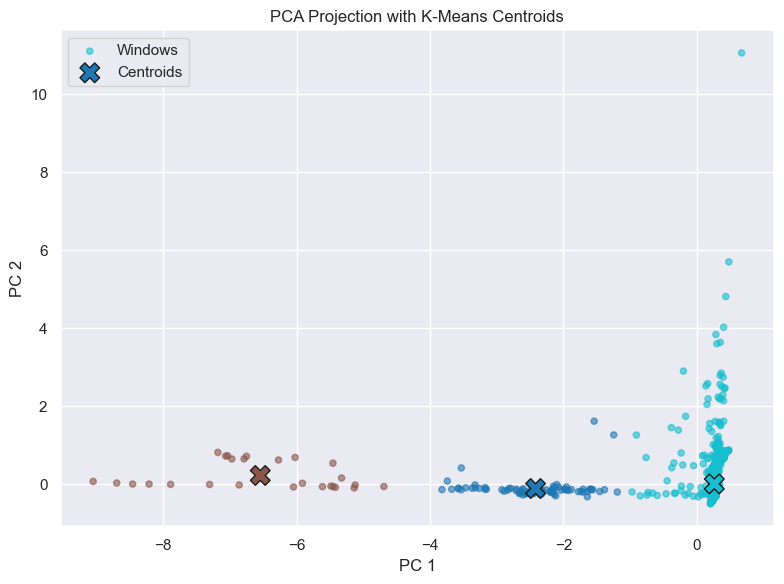

In [47]:
labels = sig_df['kmeans_label'].values        # or 'dbscan_label'

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# 2. Project centroids into the same PCA space
centroids = km_final.cluster_centers_               # shape (K, n_features)
centroids_pca = pca.transform(centroids)      # shape (K, 2)

# 3. Scatter plot of windows
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=labels,
    cmap='tab10',
    s=20,
    alpha=0.6,
    label="Windows"
)

# 4. Overlay centroids
plt.scatter(
    centroids_pca[:,0], centroids_pca[:,1],
    c=range(len(centroids_pca)),
    cmap='tab10',
    marker='X',
    s=200,
    edgecolor='k',
    label="Centroids"
)

plt.legend(loc='best')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA Projection with K-Means Centroids")
plt.tight_layout()
plt.show()


TSNE : NON LINEAR PROJECTION ON 2 COMPOENTNS

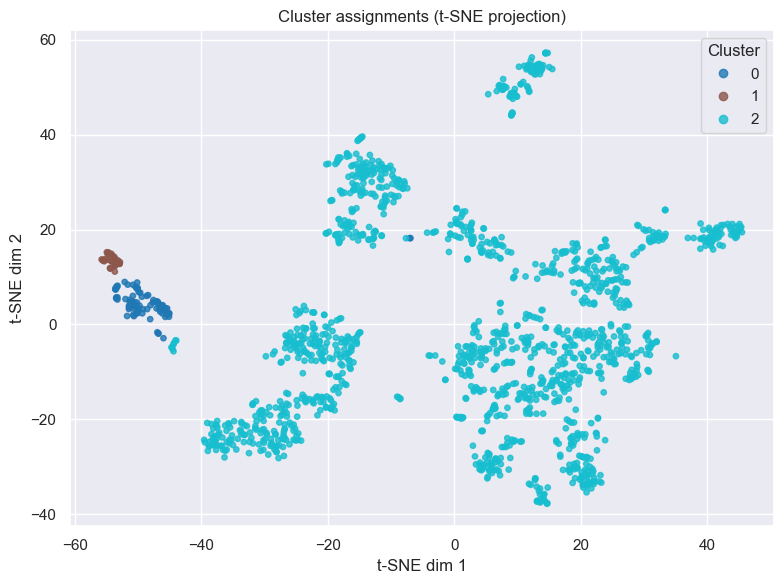

In [48]:
from sklearn.manifold import TSNE

# 1. Embed in 2D with t-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(X)

# 2. Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_tsne[:,0], X_tsne[:,1],
    c=labels,
    cmap='tab10',
    s=15,
    alpha=0.8
)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.title("Cluster assignments (t-SNE projection)")
plt.tight_layout()
plt.show()

TESTING ON NEW DATA(AUTHENTIC AND NON-AUTHENTIC): READ the DATA FILES THAT You want to test on

In [49]:
#preprocessing test data

In [50]:
#authentic_1_noise_less_antennas.csv
#authentic_2_normal.csv
#authentic_3_obstacles.csv
#non_authentic_1_diff_position.csv
#non_authentic_2_less_antennas_diff_position.csv
#non_authentic_3_no_antennas.csv

In [51]:
df1 = pd.read_csv('non_authentic_3_no_antennas.csv', sep=',', low_memory=False) # read the testing data files

In [52]:
df1.columns

Index(['ulCarrierFreq', 'timestamp', 'id', 'frame', 'slot', 'pci',
       'dlCarrierFreq', '_id.$oid', 'avgLdpcIterations', 'rnti', 'ulBytes',
       'pmi', 'rsrp', 'cqi', 'pucchSnr', 'rssi', 'ueId', 'inSync', 'dlBytes',
       'dlMcs', 'ulMcs', 'ulBler', 'ri', 'pcmax', 'puschSnr', 'dlBler', 'phr',
       'rsrq', 'sinr'],
      dtype='object')

In [55]:
#drop the Nan values and remove outliers using Isolation Forest

In [53]:
df1.dropna(inplace = True)
numeric_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
iso = IsolationForest(contamination=0.01, random_state=42)
df1['iforest_label'] = iso.fit_predict(df1[numeric_cols])
# label = −1 is an outlier
n_iso = (df1['iforest_label'] == -1).sum()
print("IsolationForest outliers:", n_iso, f"({n_iso/len(df1):.2%})")
df1 = df1[df1['iforest_label'] == 1].reset_index(drop=True)
df1.drop(columns=['iforest_label'], inplace=True)

IsolationForest outliers: 167 (1.00%)


In [54]:
#Keep the features same as training data

to_drop = [
    '_id', 'id', 'ueId',  'cqi', '_id.$oid', 'avgLdpcIterations', 'pmi',  # network IDs
    'timestamp', 'frame', 'slot',       # timing/order markers
    'pci', 'ulCarrierFreq', 'dlCarrierFreq',  # cell/carrier config
    'dlMcs', 'ulMcs', 'ri', 'pmi_0', 'pmi_1', 'phr', 'pcmax',  # control/scheduling
    'ulBytes', 'dlBytes', 'inSync'     # traffic & state
]

df1 = df1.drop(columns=to_drop, errors='ignore')

print(df1.columns)
numeric_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler() # Normalise using StandardSCALER
df1[numeric_cols] = scaler.fit_transform(df1[numeric_cols])
print(df1.head())

Index(['rnti', 'rsrp', 'pucchSnr', 'rssi', 'ulBler', 'puschSnr', 'dlBler',
       'rsrq', 'sinr'],
      dtype='object')
   rnti      rsrp  pucchSnr      rssi    ulBler  puschSnr    dlBler      rsrq  \
0  30be  1.382723  0.376472  0.205716 -1.043344  0.356751  0.048947  0.563005   
1  23b3  0.730811  0.139544 -0.076750  1.087956  0.231272 -0.444511  0.563005   
2  308f -1.343455  1.798043 -2.936717  1.087956 -1.588159  2.597808 -1.924997   
3  6695 -0.158160  0.376472  0.505836  0.983630  0.105794  0.007137  0.563005   
4  7acd -1.402719 -2.703598 -2.936717  1.087956 -1.839115  2.597808 -2.256730   

       sinr  
0  0.646472  
1  0.558259  
2 -1.558851  
3  0.073088  
4 -1.647064  


In [55]:
#prepare the time windowed sequences for test data

In [56]:
sig_df_test, window_rntis_test = extract_phy_signatures(
    df1,
    window_size=100,
    step_size=100,
    label_col='rnti'
)


In [57]:

sig_df_test.columns

Index(['mean_sinr', 'mean_rsrp', 'mean_rssi', 'mean_rsrq', 'mean_pucchSnr',
       'mean_puschSnr', 'mean_ulBler', 'mean_dlBler', 'corr_sinr_rsrp',
       'corr_sinr_rssi', 'corr_sinr_rsrq', 'corr_sinr_pucchSnr',
       'corr_sinr_puschSnr', 'corr_sinr_ulBler', 'corr_sinr_dlBler',
       'corr_rsrp_rssi', 'corr_rsrp_rsrq', 'corr_rsrp_pucchSnr',
       'corr_rsrp_puschSnr', 'corr_rsrp_ulBler', 'corr_rsrp_dlBler',
       'corr_rssi_rsrq', 'corr_rssi_pucchSnr', 'corr_rssi_puschSnr',
       'corr_rssi_ulBler', 'corr_rssi_dlBler', 'corr_rsrq_pucchSnr',
       'corr_rsrq_puschSnr', 'corr_rsrq_ulBler', 'corr_rsrq_dlBler',
       'corr_pucchSnr_puschSnr', 'corr_pucchSnr_ulBler',
       'corr_pucchSnr_dlBler', 'corr_puschSnr_ulBler', 'corr_puschSnr_dlBler',
       'corr_ulBler_dlBler'],
      dtype='object')

In [58]:
sig_df.columns

Index(['mean_sinr', 'mean_rsrp', 'mean_rsrq', 'mean_rssi', 'mean_pucchSnr',
       'mean_puschSnr', 'mean_ulBler', 'mean_dlBler', 'corr_rsrp_rssi',
       'corr_rsrp_ulBler', 'corr_rssi_ulBler', 'corr_rsrp_pucchSnr',
       'corr_pucchSnr_ulBler', 'rnti_true', 'kmeans_label'],
      dtype='object')

In [65]:
sel = ['mean_sinr', 'mean_rsrp', 'mean_rsrq', 'mean_rssi', 'mean_pucchSnr',
       'mean_puschSnr', 'mean_ulBler', 'mean_dlBler', 'corr_rsrp_rssi',
       'corr_rsrp_ulBler', 'corr_rssi_ulBler', 'corr_rsrp_pucchSnr',
       'corr_pucchSnr_ulBler']

In [66]:
sig_df_test = sig_df_test[sel]

In [67]:
sig_df_test.columns

Index(['mean_sinr', 'mean_rsrp', 'mean_rsrq', 'mean_rssi', 'mean_pucchSnr',
       'mean_puschSnr', 'mean_ulBler', 'mean_dlBler', 'corr_rsrp_rssi',
       'corr_rsrp_ulBler', 'corr_rssi_ulBler', 'corr_rsrp_pucchSnr',
       'corr_pucchSnr_ulBler'],
      dtype='object')

In [68]:
#Evaluate the performance

In [69]:
from sklearn.metrics import pairwise_distances

X = sig_df.drop(columns=['rnti_true','kmeans_label'], errors='ignore').values
X_new = sig_df_test.drop(columns='rnti_true', errors='ignore').values
print(X.shape)
print(X_new.shape)
# Train labels and assigned cluster distances
print(km_final.cluster_centers_.shape)
train_labels = km_final.labels_
train_dists = pairwise_distances(X, km_final.cluster_centers_)
train_assigned_dists = np.array([
    train_dists[i, label] for i, label in enumerate(train_labels)
])

# Per-cluster threshold
cluster_thresholds = {}
for k in range(km_final.n_clusters):
    dists_k = train_assigned_dists[train_labels == k]
    cluster_thresholds[k] = np.percentile(dists_k, 95)

# Predict on new data
new_labels = km_final.predict(X_new)
test_dists = pairwise_distances(X_new, km_final.cluster_centers_)

# Distances to assigned centroid
sig_df_test['new_dists'] = np.array([
    test_dists[i, new_labels[i]] for i in range(len(new_labels))
])

# Label based on distance to assigned cluster centroid
sig_df_test['authenticity'] = [
    'authentic' if sig_df_test['new_dists'][i] <= cluster_thresholds[new_labels[i]] else 'non_authentic'
    for i in range(len(new_labels))
]

(1537, 13)
(165, 13)
(3, 13)


In [70]:
cluster_thresholds

{0: 1.5597082108429747, 1: 2.1773861702161095, 2: 2.3443968114669524}

In [71]:
sig_df_test

,mean_sinr,mean_rsrp,mean_rsrq,mean_rssi,mean_pucchSnr,mean_puschSnr,mean_ulBler,mean_dlBler,corr_rsrp_rssi,corr_rsrp_ulBler,corr_rssi_ulBler,corr_rsrp_pucchSnr,corr_pucchSnr_ulBler,new_dists,authenticity
0,-0.429285,-0.178310,-0.498542,-0.994411,-0.403023,-0.416822,0.636989,0.871147,0.729971,-0.717659,-0.320353,0.566407,-0.295535,2.182726,authentic
1,-0.451338,-0.174162,-0.500201,-1.070147,-0.457516,-0.423095,0.638611,0.828966,0.744502,-0.712251,-0.296989,0.624858,-0.333949,2.234235,authentic
2,-0.459718,-0.175347,-0.515129,-1.113929,-0.350898,-0.404901,0.642926,0.880953,0.788735,-0.715373,-0.355888,0.593835,-0.332627,2.267511,authentic
3,-0.498973,-0.178903,-0.566548,-1.019303,-0.578350,-0.471404,0.620870,0.841843,0.713969,-0.721422,-0.327130,0.657022,-0.323354,2.299642,authentic
4,-0.495885,-0.180088,-0.546644,-1.024423,-0.727615,-0.410548,0.596604,0.811211,0.675115,-0.724770,-0.317603,0.706395,-0.340656,2.323948,authentic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.175856,0.106753,0.189805,0.367605,0.499675,0.344830,-0.348399,-0.397115,-0.755127,0.084367,0.193483,0.031044,-0.574395,1.837853,authentic
161,0.183795,0.108531,0.198098,0.445283,0.513891,0.109559,-0.338930,-0.441573,-0.742865,0.074556,0.129440,0.101579,-0.676048,1.867436,authentic
162,0.178502,0.108531,0.208050,0.342006,0.530476,0.259505,-0.355412,-0.476202,-0.775838,0.090596,0.187043,0.007789,-0.605118,1.874393,authentic
163,0.160419,0.107939,0.201416,0.444577,0.497306,0.028625,-0.347592,-0.431488,-0.774245,0.083604,0.068092,0.117166,-0.510706,1.830439,authentic


In [72]:
print(sig_df_test['authenticity'].value_counts())

authenticity
authentic    165
Name: count, dtype: int64


In [73]:
explained_var = pca.explained_variance_ratio_
total_var = explained_var.sum()
print(total_var)

0.6460283392541548


In [74]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)  # X from your training data
centroids_pca = pca.transform(km_final.cluster_centers_)

In [75]:
X_new_pca = pca.transform(X_new)

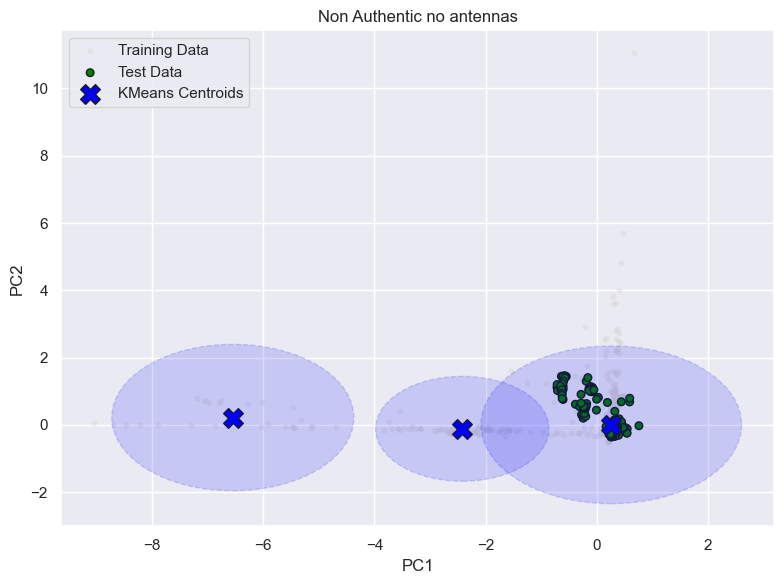

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot training data (light gray background)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='lightgray', s=10, alpha=0.3, label='Training Data')

# Plot new test data points
color_map = {'authentic': 'green', 'non_authentic': 'red'}
colors = sig_df_test['authenticity'].map(color_map)

plt.scatter(X_new_pca[:, 0], X_new_pca[:, 1], c=colors, s=30, edgecolor='k', label='Test Data')

# Overlay centroids
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1],
    c='blue', marker='X', s=200, edgecolor='k', label='KMeans Centroids'
)
for i, (cx, cy) in enumerate(centroids_pca):
    # Use per-cluster threshold if available; otherwise fallback to global
    radius = cluster_thresholds.get(i)
    
    # Optional: transform the threshold radius into PCA space — approximate by applying PCA to vector with that magnitude
    #unit_vec = km_final.cluster_centers_[i] + radius * np.ones(km_final.cluster_centers_.shape[1])
    #transformed_vec = pca.transform([unit_vec])[0]
    #scaled_radius = ((transformed_vec - centroids_pca[i])**2).sum()**0.5

    circle = Circle((cx, cy), radius, color='blue', alpha=0.15, linestyle='--', linewidth=1, fill=True)
    plt.gca().add_patch(circle)

plt.title('Non Authentic no antennas')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()